# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/CLV.csv")


In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop('Customer Lifetime Value', axis=1)
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()

In [ ]:
params = {'hidden_layer_sizes': [(12,), (20,), (25,), (10, 19), (22, 5,)],
          'activation': ['relu'],
          "alpha" : [0.001, 0.01]   
}

In [ ]:
grid = GridSearchCV(clf, params, cv=5)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(12,), (20,), (25,), (10, 19),
                                                (22, 5)]})

In [ ]:
print('Best Parameters: ', grid.best_params_)
print('Best Score: ', grid.best_score_)

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (22, 5)}
Best Score:  0.050388021680283425


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
# Create an MLPRegressor object with the best parameters
regressor = MLPRegressor(hidden_layer_sizes=(22, 5), activation='relu', alpha=0.01)

# Fit the MLPRegressor object to your scaled training data
regressor.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Compute in-sample MSE
y_pred_train = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("In-sample MSE: {:.2f}".format(mse_train))

# Compute out-of-sample MSE
y_pred_test = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Out-of-sample MSE: {:.2f}".format(mse_test))

In-sample MSE: 43314653.93
Out-of-sample MSE: 45131022.54


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=33, epochs=10)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
194/194 [==============================] - 1s 2ms/step - loss: 94096792.0000
Epoch 2/10
194/194 [==============================] - 0s 2ms/step - loss: 46919200.0000
Epoch 3/10
194/194 [==============================] - 0s 2ms/step - loss: 43997096.0000
Epoch 4/10
194/194 [==============================] - 0s 2ms/step - loss: 43452620.0000
Epoch 5/10
194/194 [==============================] - 0s 2ms/step - loss: 43175056.0000
Epoch 6/10
194/194 [==============================] - 0s 2ms/step - loss: 43084240.0000
Epoch 7/10
194/194 [==============================] - 0s 2ms/step - loss: 42936272.0000
Epoch 8/10
194/194 [==============================] - 0s 2ms/step - loss: 42905232.0000
Epoch 9/10
194/194 [==============================] - 0s 2ms/step - loss: 42841476.0000
Epoch 10/10
194/194 [==============================] - 0s 2ms/step - loss: 42829656.0000


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

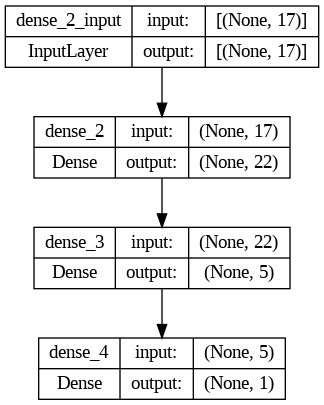

In [ ]:
# Plot the model architecture using plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Visualize the model architecture using ann_viz and save as SVG file
ann_viz(model, view = True, filename = 'annViz.gv')